In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import scipy as sc
import random
import time

In [11]:
Q=[
[-18, 12, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[12, -30, 0, 12, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[12, 0, -30, 0, 12, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 12, 0, -24, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 12, 0, -30, 0, 0, 12, 6, 0, 0, 0, 0, 0, 0],
[0, 0, 12, 0, 0, -30, 0, 0, 12, 6, 0, 0, 0, 0, 0],
[0, 0, 0, 12, 0, 0, -12, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 12, 0, 0, -24, 0, 0, 6, 6, 0, 0, 0],
[0, 0, 0, 0, 12, 0, 0, 0, -30, 0, 0, 12, 6, 0, 0],
[0, 0, 0, 0, 0, 12, 0, 0, 0, -12, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, -12, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, -24, 0, 6, 6],
[0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, -12, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, -12, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, -12]]


def T(matr):
    row = len(matr)
    stolb = len(matr[0])
    matr_ex = [[0 for i in range(row)] for _ in range(stolb)]
    for i in range(row):
        for j in range(i, stolb):
            matr_ex[i][j]=matr[j][i]
            matr_ex[j][i]=matr[i][j]
    return matr_ex

Q_T = np.array(T(Q))


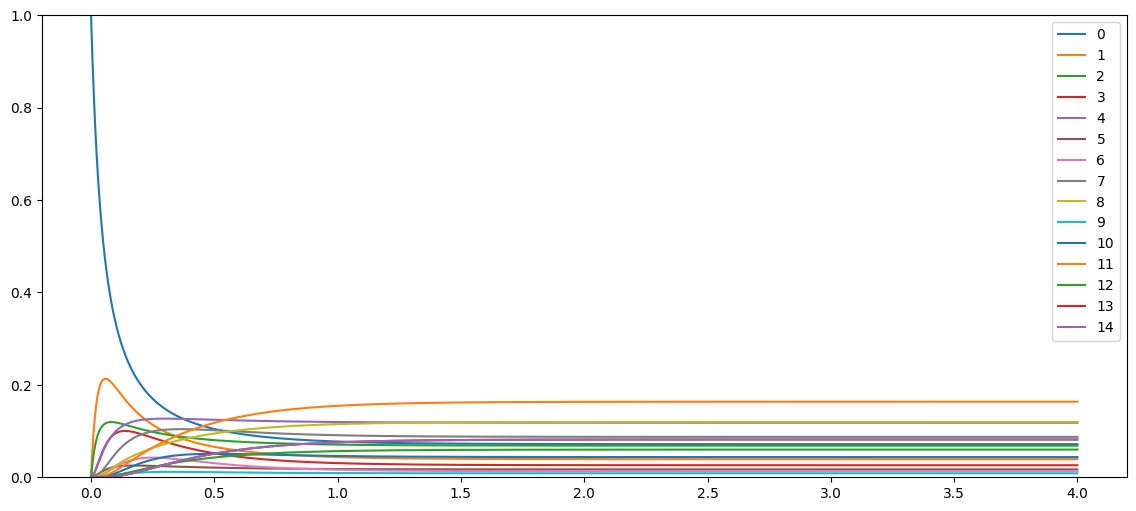

In [14]:

def forward_euler(u0, tau, T):
    N_t = int(round(T/tau))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)
    for n in range(N_t):
        u[n+1] = u[n] + tau * (Q_T @ u[n])
    return u, t

time_start = time.time()
u = np.zeros(len(Q_T))
u[0] = 1
u, t = forward_euler(u, 1e-4, 4)
time_end_1 = time.time() - time_start
plt.rcParams['figure.figsize'] = [14, 6]
for i in range(15):
    plt.ylim([0, 1])
    plt.plot(t, u[:,i])
plt.legend(range(15))
plt.show()

In [15]:
import numpy.linalg as la

# b - нулевой вектор
b = np.zeros(Q_T.shape[0])

tolerance = 1e-8  # Используем допуск для сравнения с нулем из-за вычислительной точности
time_start = time.time()
U, s, V = la.svd(Q_T)

if abs(s[-1]) < tolerance:
    null_space_vector = V[-1]  # Последний правый сингулярный вектор
    print("Найден вектор из нулевого пространства:")
    print(null_space_vector)
    
    # Масштабируем
    sm = sum(null_space_vector)
    for i in range(15):
        null_space_vector[i] = null_space_vector[i]/sm
    
    print("Масштабирование на условие:")
    print(null_space_vector)
    
    # Проверка решения:
    print("Проверка A*x (должно быть близко к нулю):")
    print(np.dot(Q_T, null_space_vector))
else:
  print("Предупреждение: последнее сингулярное число не близко к нулю.  Возможно, матрица не сингулярна в полной мере из-за вычислительных погрешностей.")

time_end_2 = time.time() - time_start

print(null_space_vector)

Найден вектор из нулевого пространства:
[0.23358173 0.12740822 0.22296438 0.08493881 0.38487898 0.05574109
 0.04246941 0.28489893 0.39063005 0.02787055 0.14244946 0.53307951
 0.19531502 0.26653976 0.26653976]
Масштабирование на условие:
[0.0716661  0.0390906  0.06840855 0.0260604  0.11808619 0.01710214
 0.0130302  0.08741093 0.1198507  0.00855107 0.04370546 0.16355616
 0.05992535 0.08177808 0.08177808]
Проверка A*x (должно быть близко к нулю):
[-7.77156117e-16 -2.22044605e-16 -2.77555756e-16 -4.44089210e-16
  8.88178420e-16  4.99600361e-16 -7.77156117e-16  1.11022302e-15
 -1.88737914e-15 -8.53483950e-16  8.88178420e-16  1.33226763e-15
  4.44089210e-16  1.11022302e-16 -1.11022302e-16]
[0.0716661  0.0390906  0.06840855 0.0260604  0.11808619 0.01710214
 0.0130302  0.08741093 0.1198507  0.00855107 0.04370546 0.16355616
 0.05992535 0.08177808 0.08177808]


In [16]:
P = u[-1,:]
print(Q_T @ P)
for i in range(len(P)):
    print(f"П{i}={P[i]:.4}", end = ", ")
print()
print(f"Время рассчета: {time_end_1}")
print("Сингулярные решения")
for i in range(len(null_space_vector)):
    print(f"П{i}={null_space_vector[i]:.4}", end = ", ")
print()
print(f"Время рассчета: {time_end_2}")

[-7.81171910e-07 -6.28493551e-07 -3.23995370e-07 -6.13648284e-07
 -2.22176030e-07 -1.06283739e-07 -4.26555892e-07 -5.16502542e-07
  6.61667334e-07 -7.38788472e-08 -3.59026941e-07  1.22588115e-06
  4.59933744e-07  8.52125438e-07  8.52125438e-07]
П0=0.07167, П1=0.03909, П2=0.06841, П3=0.02606, П4=0.1181, П5=0.0171, П6=0.01303, П7=0.08741, П8=0.1199, П9=0.008551, П10=0.04371, П11=0.1636, П12=0.05993, П13=0.08178, П14=0.08178, 
Время рассчета: 0.4208810329437256
Сингулярные решения
П0=0.07167, П1=0.03909, П2=0.06841, П3=0.02606, П4=0.1181, П5=0.0171, П6=0.01303, П7=0.08741, П8=0.1199, П9=0.008551, П10=0.04371, П11=0.1636, П12=0.05993, П13=0.08178, П14=0.08178, 
Время рассчета: 0.015426874160766602


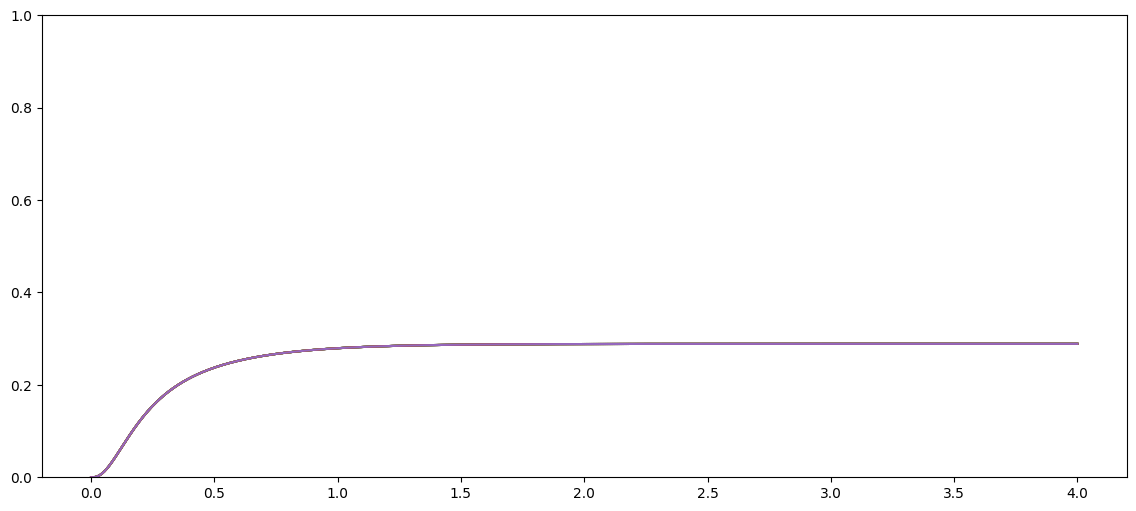

0.28876823888700365


In [17]:
u_ot = [sum(u[j,i] for i in [6,9,10,12,13,14]) for j in range(len(u))]
for i in range(15):
    plt.ylim([0, 1])
    plt.plot(t, u_ot)
# plt.legend(range(15))
plt.show()
print(sum(null_space_vector[i] for i in [6,9,10,12,13,14]))

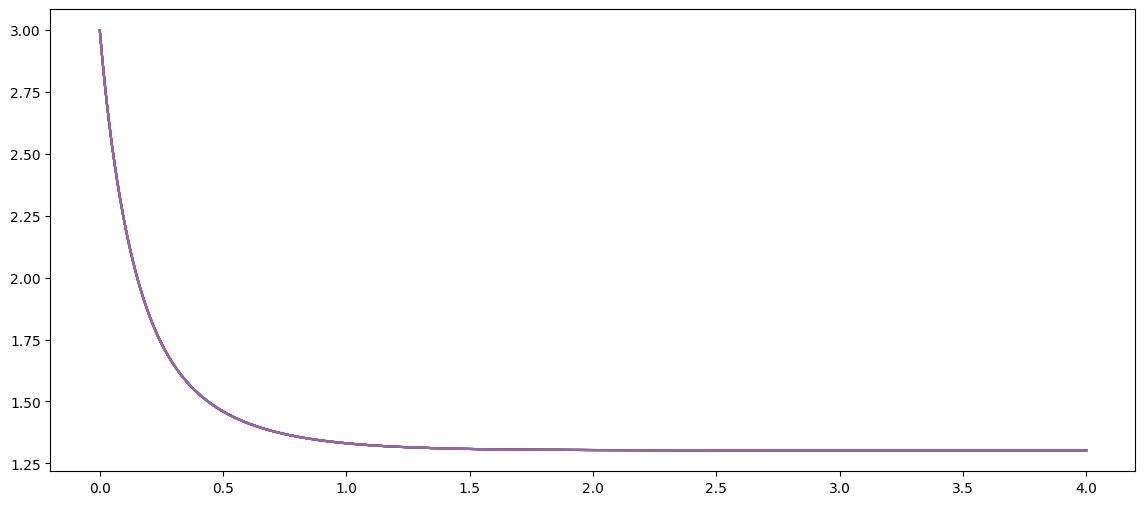

1.3026128266033263


In [18]:
P_A = [(3*sum(u[j,i] for i in [0,2,5]) + 2*sum(u[j,i] for i in [1,4,8]) + sum(u[j,i] for i in [3, 7, 11])) for j in range(len(u))]
for i in range(15):
    plt.plot(t, P_A)
# plt.legend(range(15))
plt.show()
print((3*sum(null_space_vector[i] for i in [0,2,5]) + 2*sum(null_space_vector[i] for i in [1,4,8]) + sum(null_space_vector[i] for i in [3, 7, 11])))

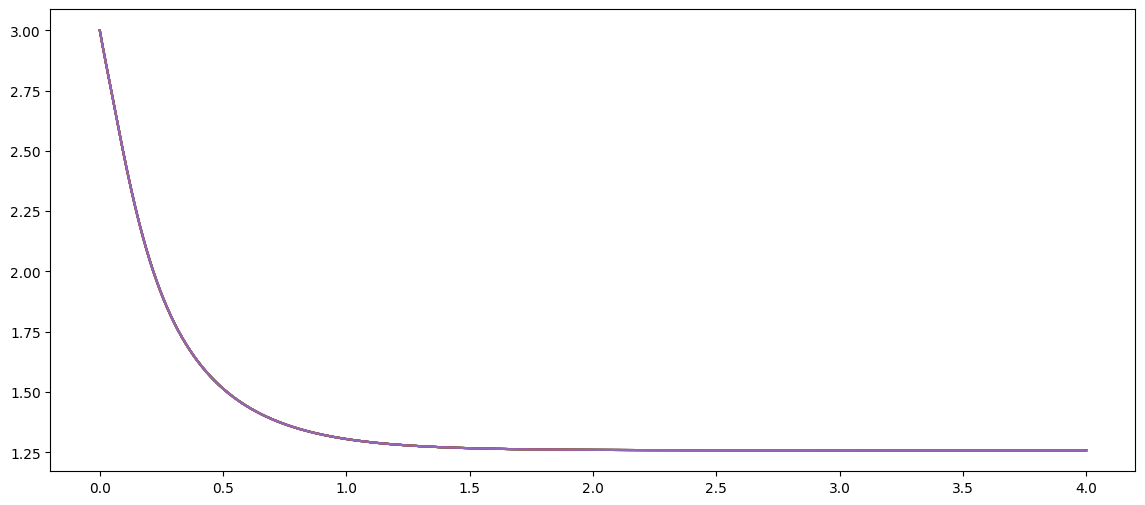

1.2587735363943993


In [19]:
P_B = [(3*sum(u[j,i] for i in [0,1,3]) + 2*sum(u[j,i] for i in [2,4,7]) + sum(u[j,i] for i in [5,8,11])) for j in range(len(u))]
for i in range(15):
    plt.plot(t, P_B)
# plt.legend(range(15))
plt.show()
print(P_B[-1])

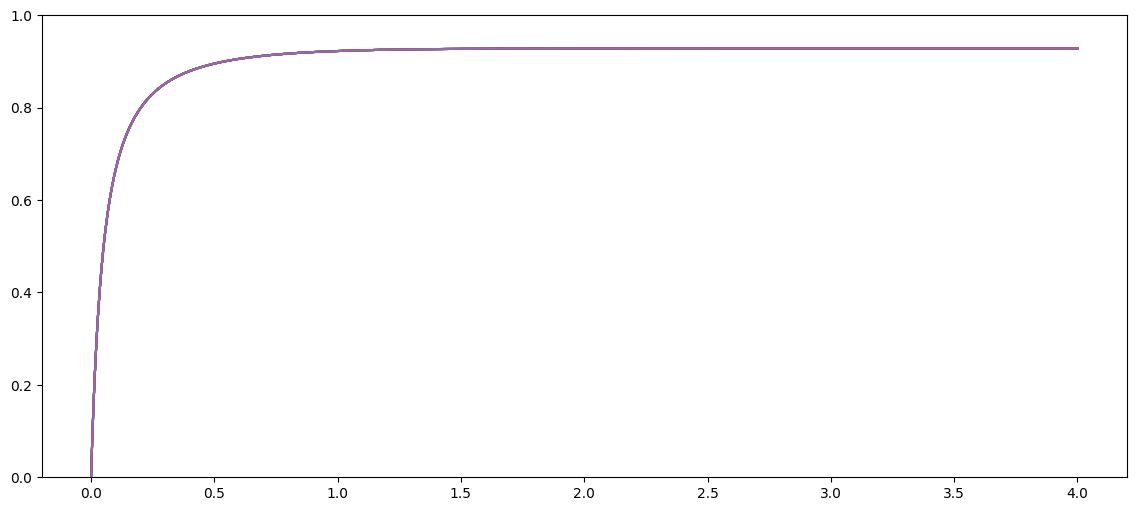

0.9283336669621189


In [20]:
rep = [sum(u[j,i] for i in range(1,15)) for j in range(len(u))]
for i in range(15):
    plt.ylim([0, 1])
    plt.plot(t, rep)
# plt.legend(range(15))
plt.show()
print(rep[-1])

In [21]:
#Евклидова норма предельного вектора
euclid_norm_pred = np.linalg.norm(null_space_vector)
print(euclid_norm_pred)

0.30681381536325103


Отношение евклидовых норм вероятности: 0.009842177464756286
Итоговое время:  1.5200000000000005
Удвоенное время:  3.040000000000001


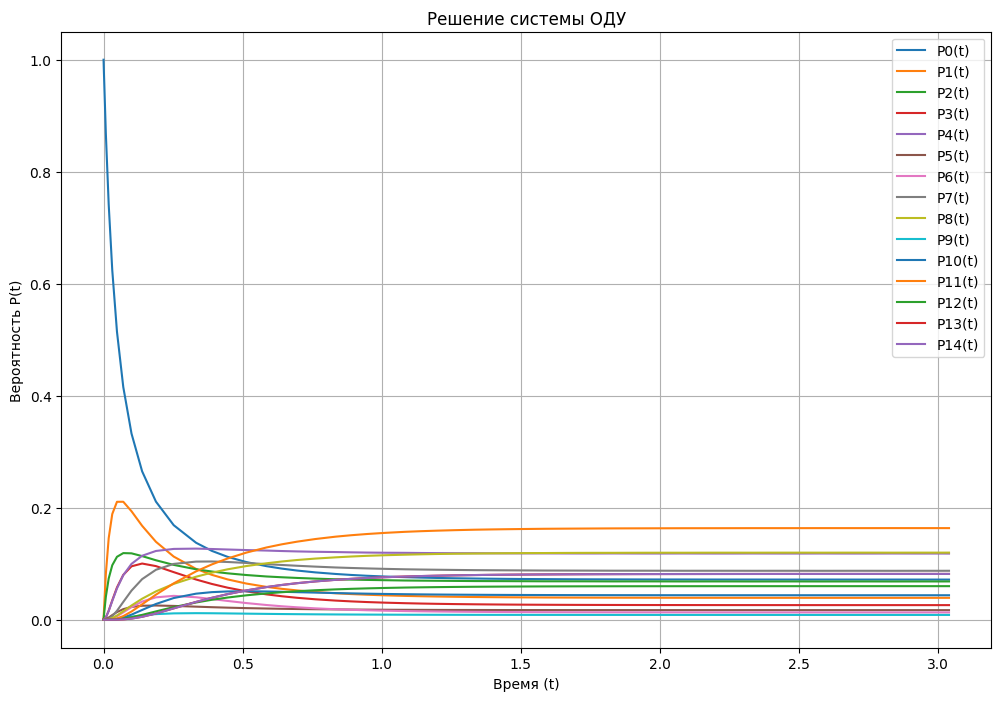

0.08177017732982275
П0=0.07168, П1=0.03909, П2=0.06839, П3=0.02607, П4=0.1181, П5=0.01711, П6=0.01303, П7=0.0874, П8=0.1198, П9=0.008551, П10=0.04371, П11=0.1636, П12=0.05992, П13=0.08177, П14=0.08177, 

In [22]:
from scipy.integrate import solve_ivp

t = symbols('t')
p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14 = symbols('p0 p1 p2 p3 p4 p5 p6 p7 p8 p9 p10 p11 p12 p13 p14') # Убрали cls=Function

eqs = [Eq(p0.diff(t), -18*p0+ 12*p1 + 12*p2),
       Eq(p1.diff(t), -30*p1+ 12*p0 + 12*p3),
       Eq(p2.diff(t), -30*p2+ 6*p0 + 12*p4 + 12*p5),
       Eq(p3.diff(t), -24*p3+ 12*p1 + 12*p6),
       Eq(p4.diff(t), -30*p4+ 6*p1 + 12*p2 + 12*p7 + 12*p8),
       Eq(p5.diff(t), -30*p5+ 6*p2 + 12*p9),
       Eq(p6.diff(t), -12*p6+ 6*p3),
       Eq(p7.diff(t), -24*p7+ 6*p3 + 12*p4 + 12*p10),
       Eq(p8.diff(t), -30*p8+ 12*p5 + 6*p4 + 12*p11 + 12*p12),
       Eq(p9.diff(t), -12*p9+ 6*p5),
       Eq(p10.diff(t), -12*p10+ 6*p7),
       Eq(p11.diff(t), -24*p11+ 6*p7 + 12*p8 + 12*p13 + 12*p14),
       Eq(p12.diff(t), -12*p12+ 6*p8),
       Eq(p13.diff(t), -12*p13+ 6*p11),
       Eq(p14.diff(t), -12*p14+ 6*p11)]

ics = {p0: 1, p1: 0, p2: 0, p3: 0, p4: 0, p5: 0, p6: 0, p7: 0, p8: 0, p9: 0, p10: 0, p11: 0, p12: 0, p13: 0, p14: 0}

p_symbols = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14]

f = []
for i in range(15):
    f.append(lambdify((t, p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14),
                        eqs[i].rhs,
                        modules=['numpy']))

def equations(t, y):
    return [f[i](t, *y) for i in range(15)]  # Вызываем функции f[i]

initial_conditions = [ics[p_symbols[i]] for i in range(15)]

euclid_norm_our = euclid_norm_pred
t_s = [0, 1]
while euclid_norm_our/euclid_norm_pred >= 0.01:
    t_s[1] +=0.01
    sol = solve_ivp(equations, t_s, initial_conditions, dense_output=True, method='RK45') # method='RK45' - один из методов Рунге-Кутты
    rzn = [sol.y[i,-1] - null_space_vector[i] for i in range(15)]
    euclid_norm_our = np.linalg.norm(rzn)
print("Отношение евклидовых норм вероятности:", euclid_norm_our/euclid_norm_pred)
print("Итоговое время: ", t_s[1])
t_s[1] *=2
t_model = t_s[1]
print("Удвоенное время: ", t_model)
sol = solve_ivp(equations, t_s, initial_conditions, dense_output=True, method='RK45') # method='RK45' - один из методов Рунге-Кутты



# print("Временные точки:", sol.t)
# print("Значения p(t):", sol.y)


plt.figure(figsize=(12, 8))
for i in range(15):
    plt.plot(sol.t, sol.y[i], label=f'P{i}(t)')

plt.xlabel('Время (t)')
plt.ylabel('Вероятность P(t)')
plt.title('Решение системы ОДУ')
plt.legend()
plt.grid(True)
plt.show()

p_last = sol.y[:,-1]
print(p_last[i])
for i in range(15):
    print(f"П{i}={p_last[i]:.4}", end = ", ")
# euclid_norm_our = np.linalg.norm(sol.y[:,-1])
# print(euclid_norm_pred)


In [23]:
rzn = [sol.y[i,-1] - null_space_vector[i] for i in range(15)]
euclid_norm_our = np.linalg.norm(rzn)
print(euclid_norm_pred)
print(euclid_norm_our/euclid_norm_pred)

0.30681381536325103
0.0001395057456224591


In [233]:
solutions_work = sum(solutions[i].rhs for i in [0,1,2,3,4,5,7,8,11])
T=integrate(solutions_work, (t, 0, oo)).evalf()
print(T)

0.268518518518518


Нахождение в состоянии 1: 0.064 секунд
Нахождение в состоянии 3: 0.011 секунд
Нахождение в состоянии 5: 0.007 секунд
Нахождение в состоянии 3: 0.026 секунд
Нахождение в состоянии 1: 0.029 секунд
Нахождение в состоянии 2: 0.112 секунд
Нахождение в состоянии 1: 0.021 секунд
Нахождение в состоянии 2: 0.001 секунд
Нахождение в состоянии 1: 0.014 секунд
Нахождение в состоянии 3: 0.033 секунд
Нахождение в состоянии 1: 0.017 секунд
Нахождение в состоянии 3: 0.019 секунд
Нахождение в состоянии 1: 0.075 секунд
Нахождение в состоянии 2: 0.024 секунд
Нахождение в состоянии 4: 0.027 секунд
Нахождение в состоянии 8: 0.045 секунд
Нахождение в состоянии 12: 0.017 секунд
Нахождение в состоянии 9: 0.066 секунд
Нахождение в состоянии 12: 0.043 секунд
Нахождение в состоянии 9: 0.042 секунд
Нахождение в состоянии 12: 0.059 секунд
Нахождение в состоянии 1: 0.236 секунд
Нахождение в состоянии 2: 0.01 секунд
Нахождение в состоянии 5: 0.015 секунд
Нахождение в состоянии 3: 0.004 секунд
Нахождение в состоянии 

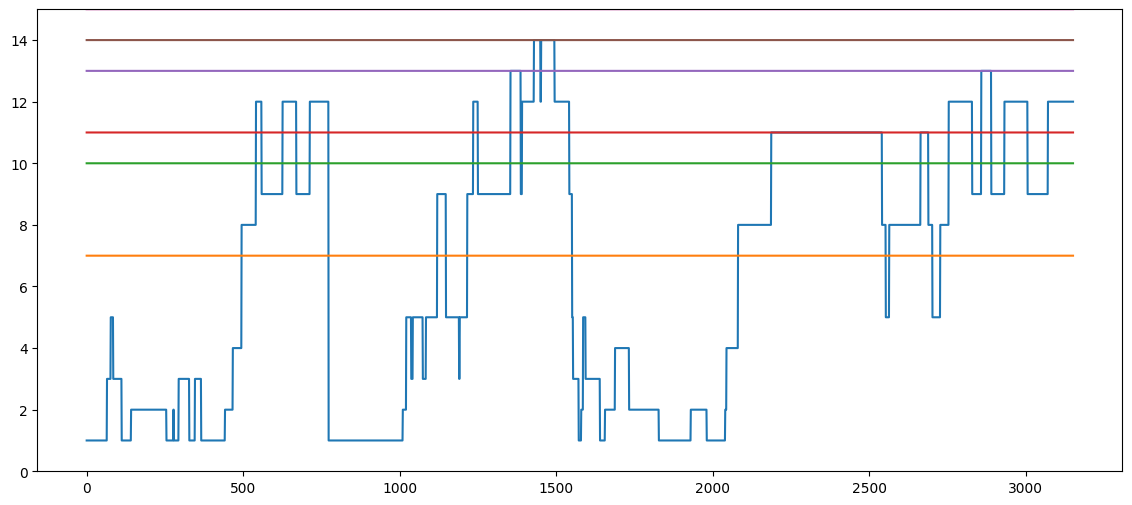

In [24]:
#Моделирование:

random.seed(time.time())

def P_d(lbd, T):
    return np.exp(-lbd*T)

def P(lbd_d,lbd, T):
    return (lbd/lbd_d)*(1-np.exp(-lbd_d*T))


end_sost = [7,10,11,13,14,15]

def end(sost):
    for s in end_sost:
        if s == sost:
            return 0
    return 1

count_iter = 1
sost_now = 0
sost_d = []
end_time = []
time_in_sost = []
T=0.0
dt=0.001




# x_values = np.arange(0, 0.26, 0.002)
# y_values = []
# for k in [1]:
#     y_values.append(np.zeros(len(x_values)))
#     for j in range(len(x_values)):
#         y_values[0][j] = P_d(Q[k][k], x_values[j])
#     plt.ylim([0, 1])
#     plt.plot(x_values, y_values[0])
#     plt.show()
# i = 1
# for k in [3,4]:
#     y_values.append(np.zeros(len(x_values)))
#     for j in range(len(x_values)):
#         y_values[i][j] = P(Q[1][1],Q[1][k], x_values[j])
#     plt.ylim([0, 1])
#     plt.plot(x_values, y_values[i])
#     i+=1
#     plt.show()





    
# for i in range(15):
#     sost_now = i
#     T = 0
#     while T < 0.8:
#         T+=0.1
#         P_loc = []
#         summ = 0
#         P_loc.append(P_d(Q[sost_now][sost_now],T))
#         for i in range(sost_now+1, 15):
#             P_loc.append(P(Q[sost_now][i],Q[sost_now][sost_now],T))
#         # summ = sum(P_loc)
#         # for i in range(len(P_loc)):
#         #     P_loc[i] = P_loc[i]/summ 
#         # for i in range(1,len(P_loc)):
#         #     P_loc[i]+=P_loc[i-1]
            
#         print("Time:")
#         print(T)
#         print("SUMM")
#         print(sum(P_loc))
#         print()
#         for pl in P_loc:
#             if pl != 0:
#                 print(pl)
#         print()



for k in range(count_iter):
    sost_now = 0
    t_all_l = 0.0
    while t_all_l < t_model:
        rndm = random.random()
        T = 0.
        while rndm < P_d(-Q[sost_now][sost_now], T):
            T+=dt
        t_all_l += T
        time_in_sost.append(T)
        sost_d.append(sost_now+1)
        pp=[]
        for i in range(15):
            if i == sost_now:
                pp.append(0)
            else:
                pp.append((Q[sost_now][i])/(-Q[sost_now][sost_now]))
        for j in range(15):
            pp[j]+=pp[j-1]
        rndm = random.random()
        j = 0
        while pp[j] < rndm:
            j+=1
        sost_now = j
    end_time.append(t_all_l)

for i in range(len(sost_d)):
    print(f"Нахождение в состоянии {sost_d[i]}: {time_in_sost[i]:.5} секунд")

stpp = int(round(t_all_l/dt))
st = [0 for i in range(stpp)]
j = 0
TT = 0
for i in range(stpp):
    if (time_in_sost[j]*1000) < i - TT:
        TT = i
        j+=1
    st[i] = sost_d[j]

plt.ylim([0, 15])
plt.plot(st)
for i in range(len(end_sost)):
    plt.plot([end_sost[i] for _ in range(stpp)])
plt.show()
    #     T+=dt
    #     sost_old = sost_now
    #     rndm = random.random()
    #     P_loc = []
    #     P_loc.append(P_d(Q[sost_now][sost_now],T))
    #     for i in range(sost_now+1, 15):
    #         P_loc.append(P(Q[sost_now][sost_now], Q[sost_now][i],T))
    #     for i in range(1,len(P_loc)):
    #         P_loc[i]+=P_loc[i-1]
    #     j = 0
    #     while  round(P_loc[j], 1) <  round(rndm, 1):
    #         j+=1
    #     sost_now += j

    #     if sost_now != sost_old:
    #         t_all_l += T
    #         T = 0.0
    #     sost_d[k].append(sost_now+1)
    # t_all_l += T
    # T = 0.0
    # end_time.append(t_all_l)
    # sost_now = 0

print()

In [25]:
class Ustr:
    def __init__(self, typeU='A'):
        self.typeU = typeU

    def time_break(self):
        return -1. / 6 * np.log(random.random())

    def time_rep(self):
        return -1. / 12 * np.log(random.random())

class Event:
    def __init__(self, ustr, timeEvent, typeEvent="Break"):
        self.typeEvent = typeEvent
        self.timeEvent = timeEvent
        self.ustr = ustr

----------------------------------
Время:  0.03283120938242319
Тип устройства:  B
Событие:  Break
----------------------------------
----------------------------------
Время:  0.04722424276767271
Тип устройства:  A
Событие:  Break
----------------------------------
----------------------------------
Время:  0.053099045789849884
Тип устройства:  B
Событие:  Rep
----------------------------------
----------------------------------
Время:  0.08464673315102761
Тип устройства:  A
Событие:  Rep
----------------------------------
----------------------------------
Время:  0.10761013879850842
Тип устройства:  A
Событие:  Break
----------------------------------
----------------------------------
Время:  0.11366942931818083
Тип устройства:  A
Событие:  Rep
----------------------------------
----------------------------------
Время:  0.25447591846811857
Тип устройства:  B
Событие:  Break
----------------------------------
----------------------------------
Время:  0.26947683286568513
Тип устройс

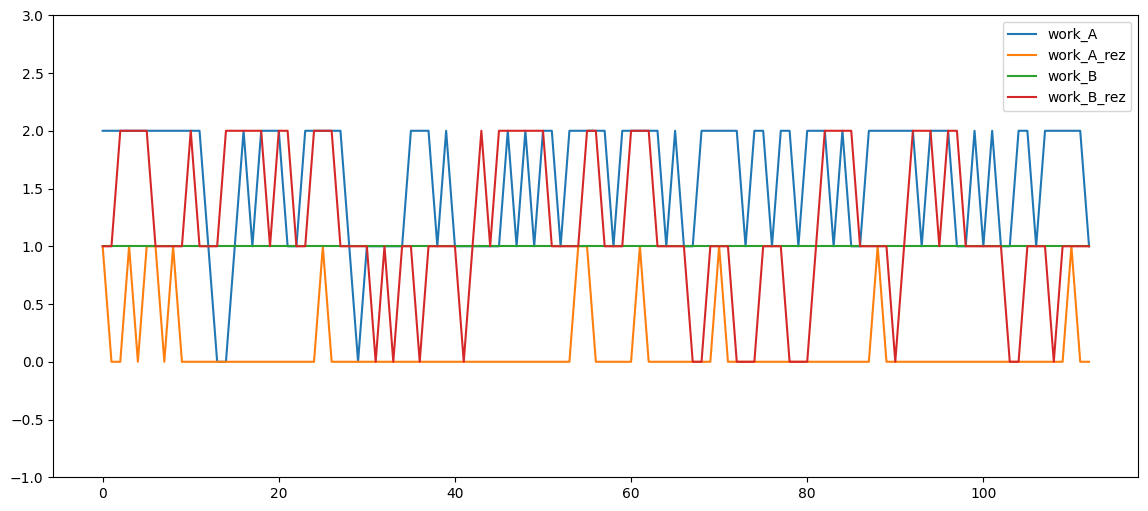

In [33]:
comp_A = [Ustr('A') for _ in range(2)]
comp_A_rez = [Ustr('A')]
comp_B = [Ustr('B')]
comp_B_rez = [Ustr('B') for _ in range(2)]
comp_A_break = []
comp_B_break = []

events = []
for elem in comp_A:
    events.append(Event(elem, elem.time_break(), "Break"))
for elem in comp_B:
    events.append(Event(elem, elem.time_break(), "Break"))

#сортировка по времени.
for k in range(len(events) - 1):
    timeMin = 2.
    j = 0
    for i in range(k, len(events)):
        if timeMin > events[i].timeEvent:
            timeMin = events[i].timeEvent
            j = i
    l = events[k]
    events[k] = events[j]
    events[j] = l
time_all = 0.

work_A = []
work_A_rez = []
work_B = []
work_B_rez = []
while time_all < t_model:
    time_all = events[0].timeEvent
    print("----------------------------------")
    print("Время: ", time_all)
    print("Тип устройства: ", events[0].ustr.typeU)
    print("Событие: ", events[0].typeEvent)
    print("----------------------------------")
    if events[0].typeEvent == "Break":
        if events[0].ustr.typeU == "A":
            if len(comp_A_rez) != 0:
                comp_A.remove(events[0].ustr)
                comp_A.append(comp_A_rez[0])
                comp_A_break.append(events[0].ustr)
                comp_A_rez.pop(0)
                events.append(Event(comp_A[-1], comp_A[-1].time_break()+time_all))
                events.append(Event(comp_A_break[-1], comp_A_break[-1].time_rep()+time_all, "Rep"))
                #удаление из event
                #Сортировка
            else:
                comp_A.remove(events[0].ustr)
                comp_A_break.append(events[0].ustr)
                events.append(Event(comp_A_break[-1], comp_A_break[-1].time_rep()+time_all, "Rep"))
        if events[0].ustr.typeU == "B":
            if len(comp_B_rez) != 0:
                comp_B.remove(events[0].ustr)
                comp_B.append(comp_B_rez[-1])
                comp_B_break.append(events[0].ustr)
                comp_B_rez.pop(-1)
                events.append(Event(comp_B[0], comp_B[0].time_break()+time_all))
                events.append(Event(comp_B_break[-1], comp_B_break[-1].time_rep()+time_all, "Rep"))
            else:
                comp_B.remove(events[0].ustr)
                comp_B_break.append(events[0].ustr)
                events.append(Event(comp_B_break[-1], comp_B_break[-1].time_rep()+time_all, "Rep"))
    else:
        if events[0].ustr.typeU == "A":
            if len(comp_A) != 2:
                comp_A.append(events[0].ustr)
                comp_A_break.remove(events[0].ustr)
                events.append(Event(comp_A[-1], comp_A[-1].time_break()+time_all))
                #удаление из event
                #Сортировка
            else:
                comp_A_rez.append(events[0].ustr)
                comp_A_break.remove(events[0].ustr)
        if events[0].ustr.typeU == "B":
            if len(comp_B) < 1:
                comp_B.append(events[0].ustr)
                comp_B_break.remove(events[0].ustr)
                events.append(Event(comp_B[-1], comp_B[-1].time_break()+time_all))
            else:
                comp_B_rez.append(events[0].ustr)
                comp_B_break.remove(events[0].ustr) 
    work_A.append(len(comp_A))
    work_A_rez.append(len(comp_A_rez))
    work_B.append(len(comp_B))
    work_B_rez.append(len(comp_B_rez))
        # Дописать время и удаление из event
    events.pop(0)
    i = len(events) - 1
    while i > 0 and events[i].timeEvent < events[i-1].timeEvent:
        ell = events[i]
        events[i] = events[i-1]
        events[i-1] = ell
        i-=1
print(work_A)
print(work_A_rez)
print(work_B)
print(work_B_rez)

plt.ylim([-1, 3])
plt.plot(work_A)
plt.plot(work_A_rez)
plt.plot(work_B)
plt.plot(work_B_rez)
plt.legend(["work_A", "work_A_rez", "work_B", "work_B_rez"])
plt.show()